In [ ]:
#importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from config import DATA_PATH

In [ ]:
#Importando el dataset como un DataFram de pandas
df_original = pd.read_csv(DATA_PATH)
df = df_original.copy()

In [4]:
#Verificacion inicial del dataset (df)
print(df.shape)
print(df.info())


(500000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   patient_id                  500000 non-null  object 
 1   age                         500000 non-null  int64  
 2   gender                      479652 non-null  object 
 3   visit_date                  500000 non-null  object 
 4   specialty                   500000 non-null  object 
 5   diagnosis                   500000 non-null  object 
 6   procedure                   500000 non-null  object 
 7   doctor_id                   500000 non-null  object 
 8   hospital_id                 500000 non-null  object 
 9   city                        500000 non-null  object 
 10  country                     500000 non-null  object 
 11  visit_type                  495071 non-null  object 
 12  visit_duration_minutes      500000 non-null  int64  
 13  o

Vemos que hay 16 columnas y 500mil filas. Algunas observaciones iniciales:
-Las columnas 'gender'  y 'visit_type' contienen valores nulos (null). 
-La columna 'visit_date' no se leyo como tipo fecha.
-Tenemos 4 columnas numericas: age,  visit_duration_minutes, readmission_within_30_days, cost_usd 

In [5]:
#Revisando los valores nulos
print("Valores nulos por columna:\n ", df.isnull().sum())
df_nulls = df[["gender","visit_type"]]
print("\nEl porcentaje de valores nulos es:\n", (df_nulls.isnull().sum() / len(df)) * 100) 


Valores nulos por columna:
  patient_id                        0
age                               0
gender                        20348
visit_date                        0
specialty                         0
diagnosis                         0
procedure                         0
doctor_id                         0
hospital_id                       0
city                              0
country                           0
visit_type                     4929
visit_duration_minutes            0
outcome                           0
readmission_within_30_days        0
cost_usd                          0
dtype: int64

El porcentaje de valores nulos es:
 gender        4.0696
visit_type    0.9858
dtype: float64


Tenemos formas de encargarnos de los valores nulos en col tipo categoricas: mode (valor mas repetido), imputation. 
Se recomienda MODE cuando el % de nulls es <%5

Visualizando un sample de la data: las primero 5 y ultimas 5 filas

In [6]:
display(df.head())


,patient_id,age,gender,visit_date,specialty,diagnosis,procedure,doctor_id,hospital_id,city,country,visit_type,visit_duration_minutes,outcome,readmission_within_30_days,cost_usd
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,92,M,2023-03-11,Pediatría,Sunt cum.,Consequatur.,d8473694-cda8-4947-88dd-38b5c72bcefe,0fd45397-be87-48cf-94b4-180186eac1d4,Santiago,Argentina,Consulta,486,Reingreso,0,3851.00
1,23b8c1e9-3924-46de-beb1-3b9046685257,82,M,2020-08-14,Dermatología,Temporibus dolor.,Qui eligendi.,9d7a5834-e676-46fb-bd68-9951582578e4,94fae0f0-5bb7-4234-b00e-ce3557f2026f,Bogotá,Argentina,Hospitalización,572,Fallecimiento,1,2959.96
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,4,M,2023-01-03,Cardiolgia,Porro optio facere.,Fugiat pariatur.,09c54acd-f0ad-4a23-a5e2-d34d414d62bd,2fdd830b-52c8-45f5-b383-230c17dd7c22,Ciudad de México,Chile,Emergencia,101,Fallecimiento,0,3632.33
3,972a8469-1641-4f82-8b9d-2434e465e150,96,F,2020-06-15,Cirujia,Necessitatibus tempora eum.,Eaque.,bf5f0e16-c161-488e-ae99-8ecf7fb825dc,3697c736-77c4-4cc4-a6ae-b696bc49d111,Santiago,Ecuador,Emergencia,589,Alta,0,85.57
4,17fc695a-07a0-4a6e-8822-e8f36c031199,61,M,2021-11-05,Dermatología,Quam in.,Cupiditate ullam.,d1a80cba-621f-478a-9576-d97aa95c27b4,a89ff296-918d-474f-a697-a6e17330e3ce,Lima,Chile,Consulta,8,Fallecimiento,0,2603.25


In [7]:
display(df.tail())

,patient_id,age,gender,visit_date,specialty,diagnosis,procedure,doctor_id,hospital_id,city,country,visit_type,visit_duration_minutes,outcome,readmission_within_30_days,cost_usd
499995,431c9a3f-b06b-4b94-8dd5-838f2d6ac395,105,M,2021-08-08,Cirugía,Voluptatibus molestias ut.,Aperiam neque.,2632e35f-ead1-42d0-a76e-b09bbc591311,2b2367c6-198e-486e-92a4-c7b48591a4fc,Lima,México,Hospitalización,372,Fallecimiento,0,4962.68
499996,7f7b3b63-6448-41b6-b7b0-4e9edfee7331,35,F,2021-05-05,Urgencias,Ab possimus pariatur.,Error porro.,71a6b2bc-86ab-44e0-87ba-efdfdac2f8e2,d2ca8c71-daae-4438-a4b3-4ca4ffb01533,Buenos Aires,Ecuador,Emergencia,559,Reingreso,0,1799.49
499997,41679938-f4b6-48ab-baa7-011af1d90ba8,45,F,2024-01-28,Cirugía,Atque dicta.,Officiis.,5fb756df-a308-46f7-87bf-825841937973,b471a44d-55dd-4a36-b715-9b6fa0675278,Bogotá,Perú,Consulta,65,Referencia,0,4195.80
499998,6c299452-c15c-4dd6-9b35-9946dd9404a0,57,M,2021-05-15,Urgencias,Totam.,Eveniet.,b50bc8e8-c1a0-4cbd-a718-2b2b6f3ade9a,775544eb-a7e6-4335-98a7-04c2c5c60424,Santiago,Chile,Emergencia,379,Referencia,0,3474.76
499999,e8b237c0-9f41-49e9-b922-63f189d37e5e,15,M,2025-05-21,Pediatría,Sunt.,Omnis asperiores.,c3d7728c-526b-40e5-9392-09f64aed90e3,48b01eab-1fea-495e-ae34-623346eb4bd5,Santo Domingo,Ecuador,Emergencia,149,Alta,0,1022.39


La col 'readmission_within_30_days' no es numerica, es binaria indicando yes/no

In [ ]:
#Estadisticas de las columnas numericas
df_numeric = df[["age", "visit_duration_minutes", "cost_usd"]]
display(df_numeric.describe())

,age,visit_duration_minutes,cost_usd
count,500000.000000,500000.000000,500000.000000
mean,59.410150,301.582848,3514.091953
std,40.445605,171.685096,10312.385463
min,-10.000000,5.000000,0.000000
25%,24.000000,153.000000,1243.165000
50%,59.000000,301.500000,2514.515000
75%,94.000000,450.000000,3780.762500
max,129.000000,599.000000,109998.219272


La col. 'age' tiene valores negativos, tendremos que encargarnos de estos. 

Ahora vamos a ver los outliers en todas las columnas numericas.

In [29]:
#Analizando 'age' 
print("\nEdades menores a 0:")
impossible_ages = df[df['age'] < 0]
qty = len(impossible_ages)
print(f"Hay {qty} edades invalidas") 


Edades menores a 0:
Hay 35933 edades invalidas


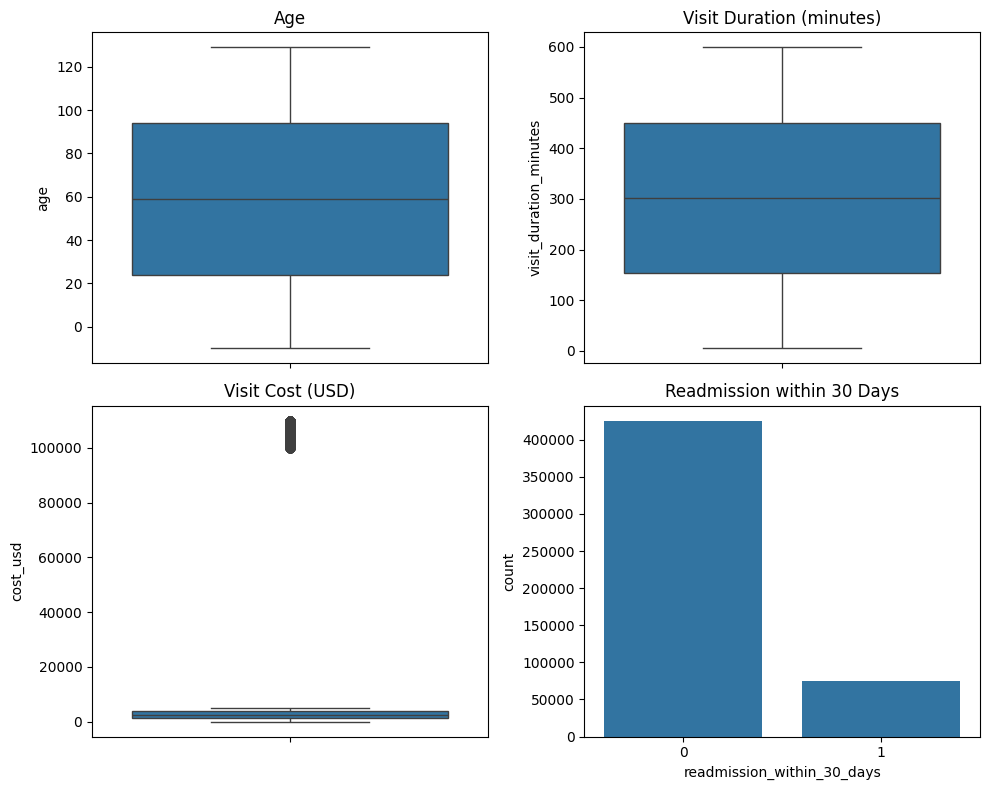

In [23]:
# Visualizando las columnas numericas
plt.figure(figsize=(10, 8))

# Age 
plt.subplot(2, 2, 1)
sns.boxplot(df['age'])
plt.title('Age')

# Visit Duration
plt.subplot(2, 2, 2)
sns.boxplot(df['visit_duration_minutes'])
plt.title('Visit Duration (minutes)')

# Cost USD
plt.subplot(2, 2, 3)
sns.boxplot(df['cost_usd'])
plt.title('Visit Cost (USD)')

# Readmission within 30 days
plt.subplot(2, 2, 4)
sns.countplot(x='readmission_within_30_days', data=df)
plt.title('Readmission within 30 Days')


plt.tight_layout()
plt.show()

Observamos unos outliers en cost_usd.

Verificando las demas columnas

In [35]:
for col in ['gender', 'specialty', 'city', 'country', 'visit_type', 'outcome']:
    print(f"\nValores unicos y conteo para '{col}':\n{df[col].value_counts()}")



Valores unicos y conteo para 'gender':
gender
M    239859
F    239793
Name: count, dtype: int64

Valores unicos y conteo para 'specialty':
specialty
Pediatría           36019
Ginecología         35897
Cirujia             35890
Urgencias           35821
Pediatra            35726
Ginecplogía         35718
Medicina Interna    35680
Neurología          35661
Ortopedia           35661
Cirugía             35635
Dermatología        35627
Oncología           35626
Cardiolgia          35583
Cardiología         35456
Name: count, dtype: int64

Valores unicos y conteo para 'city':
city
Lima                71847
Santo Domingo       71573
Buenos Aires        71432
Quito               71431
Bogotá              71394
Santiago            71219
Ciudad de México    71104
Name: count, dtype: int64

Valores unicos y conteo para 'country':
country
Argentina               71870
Colombia                71658
México                  71594
Ecuador                 71531
República Dominicana    71337
Chile     

Tomamos nota de que hay normalizar varias especialidades.

Vamos a comenzar a limpiar la data.
1-Vamos a eliminar las filas con edades fuera de rango (menores de 0 y mayores de 120)
2-Reemplazar los null en 'gender' y 
3-Estandarizar las specialty, paises